# Academic Query Classification
To resolve students' doubts we need to understand the doubt category. Based on the category we can serve the best result for the asked query

# Importing and Understanding Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk.corpus import stopwords


In [3]:
# Importing df.csv

df = pd.read_csv('train.csv')

In [4]:
# Looking at the first five rows

df.head()

,unique ID,query_text,category
0,0,HTTPS://VIMEO.COM/107297364﻿,junk
1,1,Art and Culture,general
2,2,Differentiate between chemical and biological ...,academic_servable
3,3,nth Term of an AP,academic_servable
4,4,bunmei kaika: aoiza ibunroku saien,junk


### 1.Basic dataset information

In [5]:
# see the type of each column

df.shape

(5000, 3)

In [6]:
# see the type of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   unique ID   5000 non-null   int64 
 1   query_text  5000 non-null   object
 2   category    5000 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [7]:
df.columns

Index(['unique ID', 'query_text', 'category'], dtype='object')

In [8]:
# look at the statistical aspects of the dataframe

df.describe(include = "all")

,unique ID,query_text,category
count,5000.000000,5000,5000
unique,NaN,5000,5
top,NaN,HTTPS://VIMEO.COM/107297364﻿,academic_servable
freq,NaN,1,1750
mean,2499.500000,NaN,NaN
std,1443.520003,NaN,NaN
min,0.000000,NaN,NaN
25%,1249.750000,NaN,NaN
50%,2499.500000,NaN,NaN
75%,3749.250000,NaN,NaN


### 2. Data Cleaning

In [9]:
# Checking for Null values

df.isnull().sum()

unique ID     0
query_text    0
category      0
dtype: int64

In [10]:
# Checking for duplicate values

df.duplicated().sum()

0

In [11]:
def print_plot(index):
    example = df[df.index == index][['query_text', 'category']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])

In [12]:
print_plot(50)

In an A.P the sum of first 9 terms is 14 more than 5 times the 8th term, 8th and 2nd terms are in the ratio 11:2, Find the sum of first 20 terms of the A.P
Tag: academic_servable


#  EDA for Text

##### Details of the classification classes (categories):
###### academic_servable:
Queries that indicate a clear intent to seek or provide academic services, such as tutoring, research assistance, or course-related help. e.g. 'what is inertia'.
###### academic_non_servable:
Queries related to academic topics but without a clear intent to seek or provide services. These might include general academic discussions or queries about educational concepts. e.g. 'What will come in place of the question mark(?) in the given number series?'.
###### general:
Non-academic queries that cover a wide range of topics unrelated to academics. e.g. 'Could you give me a brief overview of haryana police si'.
###### junk:
Queries that contain irrelevant, nonsensical, or spam content. e.g. 'X-Men: Mutant Academy 2'.
###### conversational:
Queries that are part of a conversation or dialogue and don't necessarily fall into the other categories. e.g. 'ansar me'.



In [13]:
df.category.value_counts()

academic_servable        1750
junk                     1000
general                  1000
academic_non_servable     750
conversational            500
Name: category, dtype: int64

### 3. Distribution of categories using a count plot.

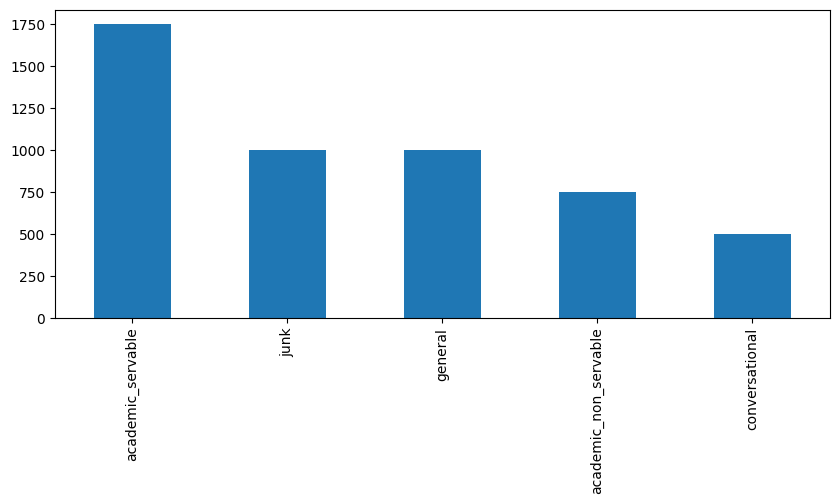

In [14]:
my_tags = set(list(df['category']))
plt.figure(figsize=(10,4))
df.category.value_counts().plot(kind='bar');

### 4. Analysis of text length distribution.

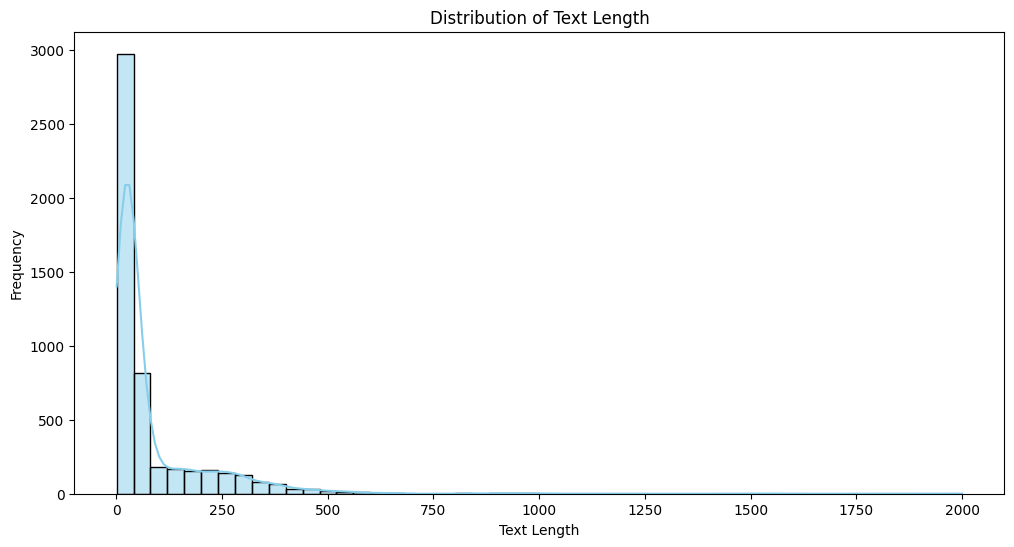

In [15]:
# Text length analysis
df['text_length'] = df['query_text'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(df['text_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

### 5. Displaying a few sample queries from each category.


In [16]:
# Display a few samples from each category
categories_to_display = df['category'].unique()
for category in categories_to_display:
    sample_text = df[df['category'] == category]['query_text'].iloc[0]
    print(f"\nSample Text for Category '{category}':\n{sample_text}\n")


Sample Text for Category 'junk':
HTTPS://VIMEO.COM/107297364﻿


Sample Text for Category 'general':
Art and Culture


Sample Text for Category 'academic_servable':
Differentiate between chemical and biological origin of life


Sample Text for Category 'conversational':
plesae gujari langvaj talik me


Sample Text for Category 'academic_non_servable':
 Given that, y=5cos - 4x ...1 The given function looks like, y=afxn ...2 Here a and n are constants. Then, dydx=ddxafxn=addxfxn dydx=anfxn - 1ddxfx dydx=anfxn - 1f'x ...(3). From equation (1) and (2), we can write, a=5, n= - 4, fx=cosx and f'x=ddxfx=ddxcosx f'x= - sinx. Substituting all the values in equations (3), dydx=5 - 4 cosx - 4 - 1 - sinx dydx=20sinxcos - 5 x. 



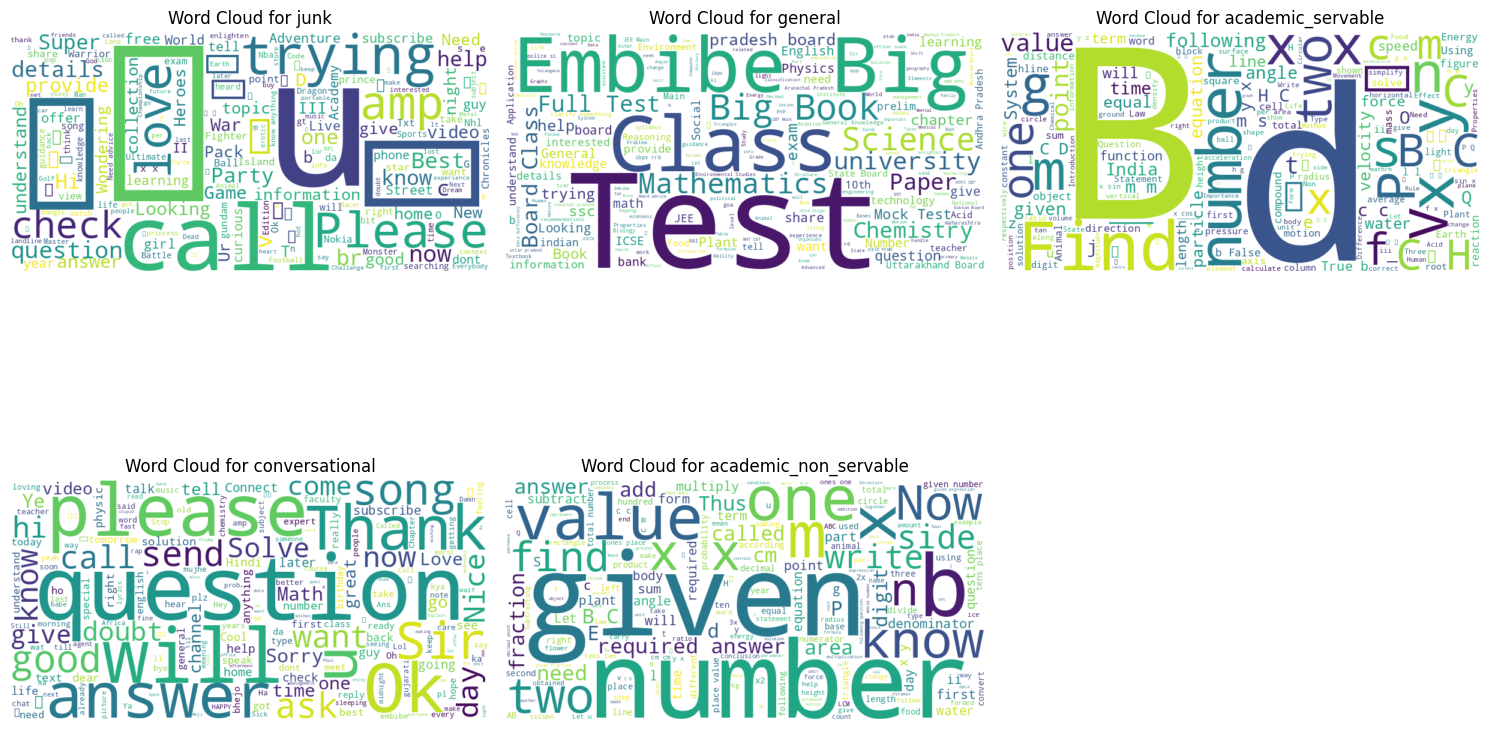

In [17]:
# Word cloud for each category
from wordcloud import WordCloud



plt.figure(figsize=(15, 10))
for i, category in enumerate(categories_to_display, 1):
    plt.subplot(2, 3, i)
    text_for_category = " ".join(df[df['category'] == category]['query_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_category)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {category}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Data Preperation for ML Model

These are commonly used techniques to clean and prepare text data for machine learning models.

Here's a brief explanation of each component:

###### REPLACE_BY_SPACE_RE:

Regular expression to replace certain symbols (like parentheses, brackets, etc.) with spaces.
######  BAD_SYMBOLS_RE:

Regular expression to remove symbols and characters that are not alphanumeric, space, or specific allowed characters.
###### STOPWORDS:

A set of common English stopwords (e.g., "the," "and," "is") that are typically removed during text preprocessing to focus on more meaningful words.

In [18]:
import re
# Define your regular expressions
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

In [19]:
from nltk.corpus import stopwords

# Download the stopwords dataset
nltk.download('stopwords')

# Define your stopwords set
STOPWORDS = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
import re
from nltk.corpus import stopwords

# Assuming you've already defined the patterns and stopwords

def clean_text(text):
    # Replace symbols with spaces
    text = re.sub(REPLACE_BY_SPACE_RE, ' ', text)

    # Remove symbols and characters that are not alphanumeric
    text = re.sub(BAD_SYMBOLS_RE, '', text)

    # Convert to lowercase and split into words
    words = text.lower().split()

    # Remove stopwords
    words = [word for word in words if word not in STOPWORDS]

    # Join the cleaned words back into a string
    cleaned_text = ' '.join(words)

    return cleaned_text


In [21]:
df['query_text'] = df['query_text'].apply(clean_text)

In [22]:
print_plot(50)

n sum first 9 terms 14 5 times 8th term 8th 2nd terms ratio 112 ind sum first 20 terms
Tag: academic_servable


# Building Machine Learning Model

In [23]:
X = df.query_text
y = df.category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

### 1.Naive Bayes classifier for multinomial model

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [25]:
%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.612
                       precision    recall  f1-score   support

                 junk       0.88      0.67      0.76       215
    academic_servable       0.50      0.93      0.65       519
       conversational       0.89      0.21      0.34       153
academic_non_servable       0.79      0.58      0.67       313
              general       0.69      0.26      0.38       300

             accuracy                           0.61      1500
            macro avg       0.75      0.53      0.56      1500
         weighted avg       0.69      0.61      0.58      1500

CPU times: user 102 ms, sys: 0 ns, total: 102 ms
Wall time: 161 ms


### 2. Linear support vector machine

In [26]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [27]:
%%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.6593333333333333
                       precision    recall  f1-score   support

                 junk       0.75      0.84      0.79       215
    academic_servable       0.58      0.84      0.69       519
       conversational       0.63      0.47      0.54       153
academic_non_servable       0.81      0.64      0.71       313
              general       0.69      0.34      0.46       300

             accuracy                           0.66      1500
            macro avg       0.69      0.63      0.64      1500
         weighted avg       0.68      0.66      0.65      1500

CPU times: user 98.2 ms, sys: 1.6 ms, total: 99.8 ms
Wall time: 137 ms


### 3.Tokenization

In [28]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

In [29]:
train_size = int(len(df) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(df) - train_size))

Train size: 3500
Test size: 1500


In [30]:
train_posts = df['query_text'][:train_size]
train_tags = df['category'][:train_size]

test_posts = df['query_text'][train_size:]
test_tags = df['category'][train_size:]

In [31]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [32]:
tokenize.fit_on_texts(train_posts) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [33]:
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [34]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [35]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (3500, 1000)
x_test shape: (1500, 1000)
y_train shape: (3500, 5)
y_test shape: (1500, 5)


In [36]:
batch_size = 32
epochs = 2

In [37]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [38]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/2
99/99 [==============================] - 3s 21ms/step - loss: 1.3040 - accuracy: 0.4895 - val_loss: 1.1437 - val_accuracy: 0.5114
Epoch 2/2
99/99 [==============================] - 2s 17ms/step - loss: 0.9457 - accuracy: 0.6095 - val_loss: 0.9974 - val_accuracy: 0.5771


In [39]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

47/47 [==============================] - 1s 10ms/step - loss: 0.9396 - accuracy: 0.5993
Test accuracy: 0.5993333458900452
